In [ ]:
#cleaning and loading of data
#plots
#Decision Trees
#Logistic Regression
#XGBoost (Extreme Gradient Boosting)
#results of model
#factor plots

In [4]:
import pandas as pd
import matplotlib as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/portfolio work/cirrhosis.csv')

In [8]:
# check size of dataset
data.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [9]:
# check the first five observations
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


<Axes: >

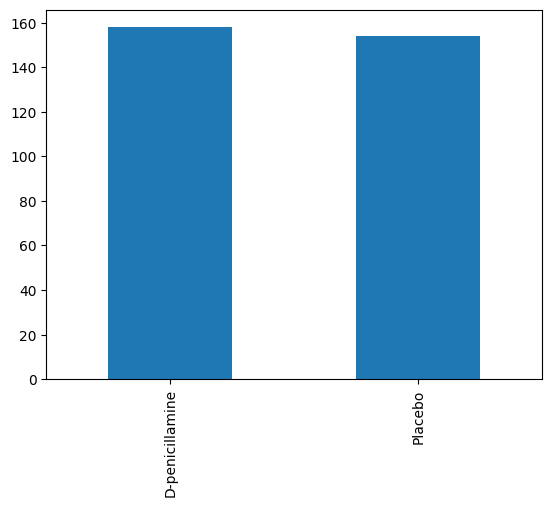

In [10]:
# create plots of each of the variables
# categorical data for male or female
data['Drug'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

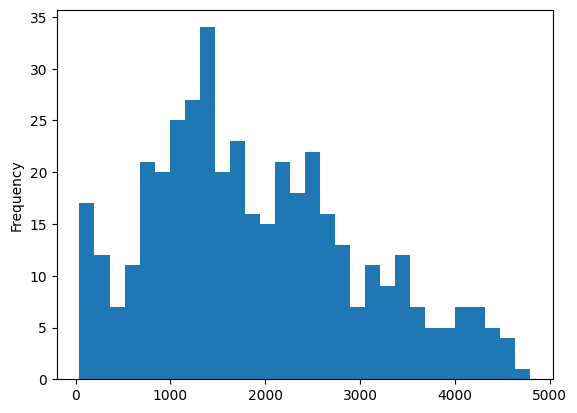

In [11]:
data['N_Days'].plot(kind='hist', bins = 30)

<Axes: >

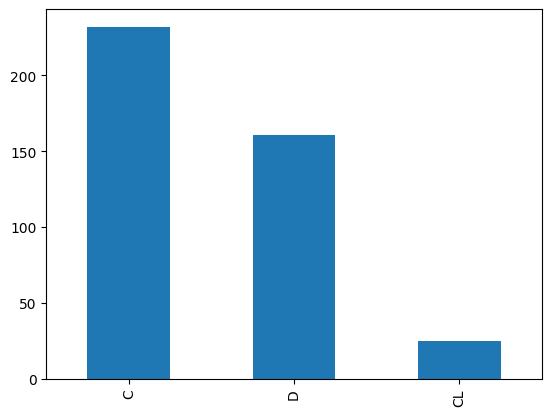

In [12]:
data['Status'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

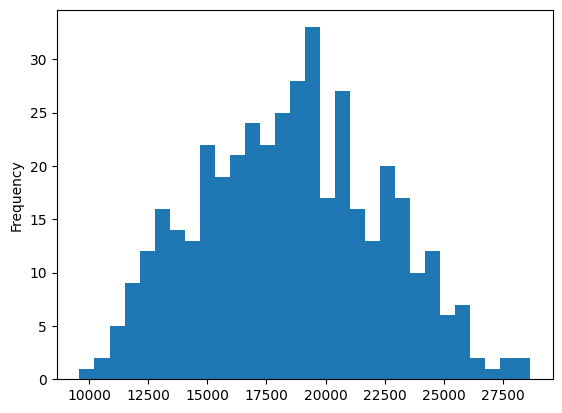

In [13]:
data['Age'].plot(kind='hist', bins = 30)

<Axes: >

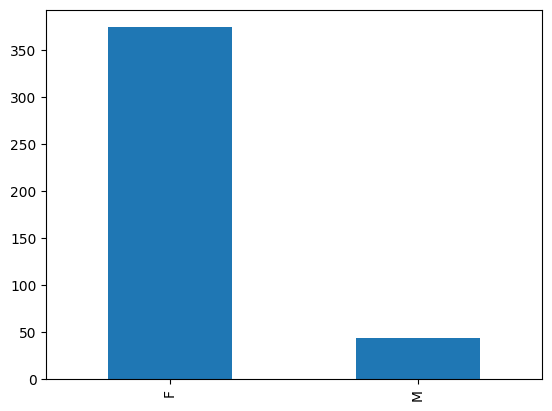

In [14]:
data['Sex'].value_counts().plot(kind='bar')

<Axes: >

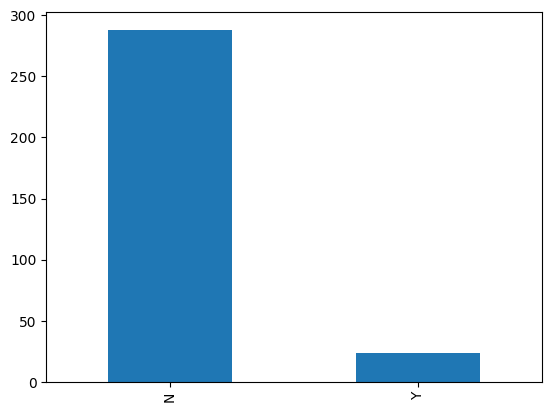

In [15]:
data['Ascites'].value_counts().plot(kind='bar')

<Axes: >

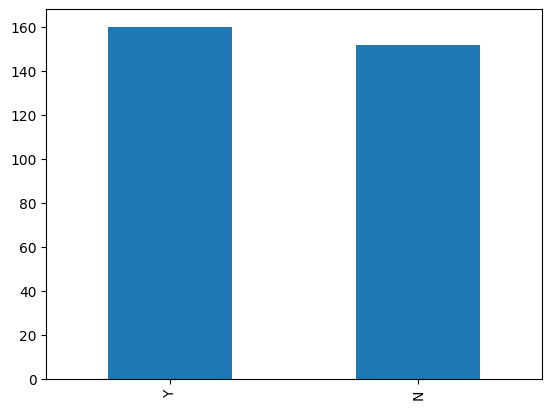

In [16]:
data['Hepatomegaly'].value_counts().plot(kind='bar')

<Axes: >

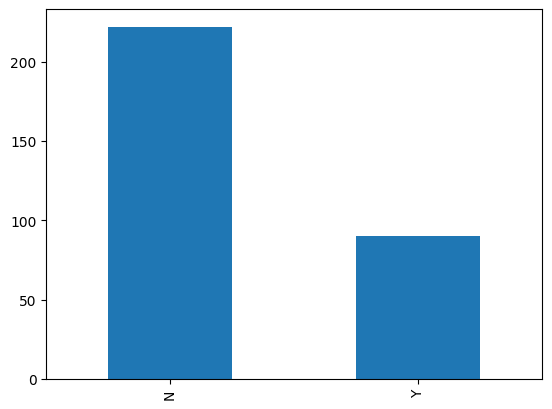

In [17]:
data['Spiders'].value_counts().plot(kind='bar')

<Axes: >

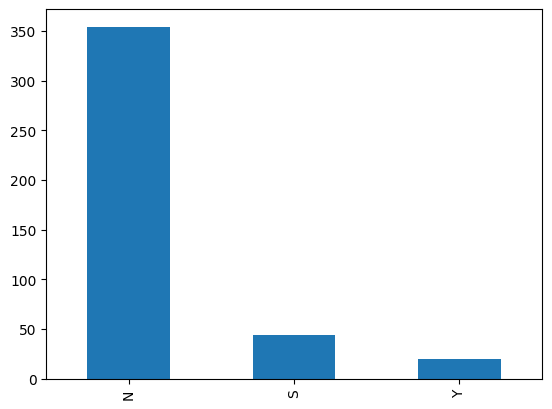

In [18]:
data['Edema'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

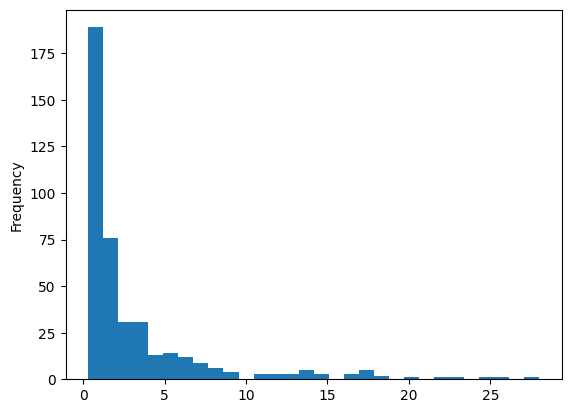

In [19]:
data['Bilirubin'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

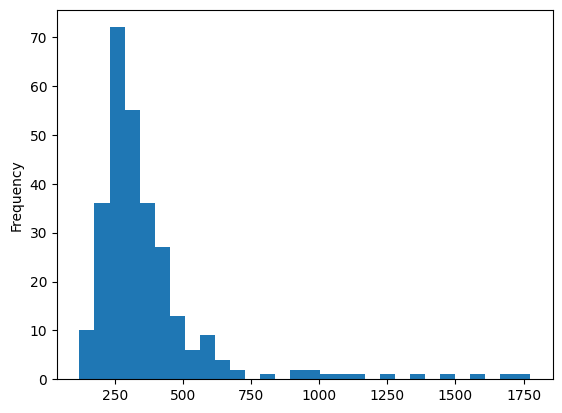

In [20]:
data['Cholesterol'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

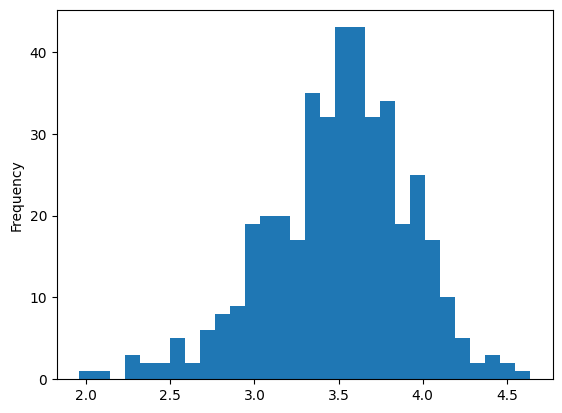

In [21]:
data['Albumin'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

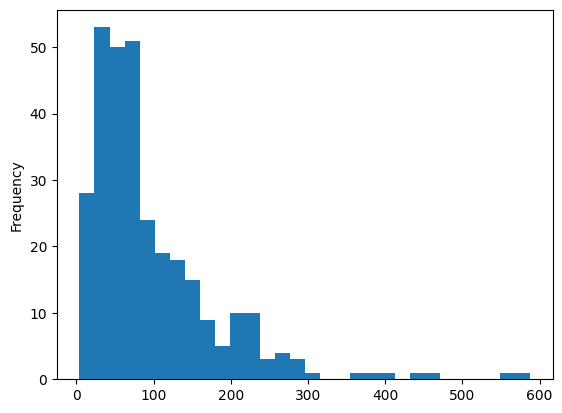

In [22]:
data['Copper'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

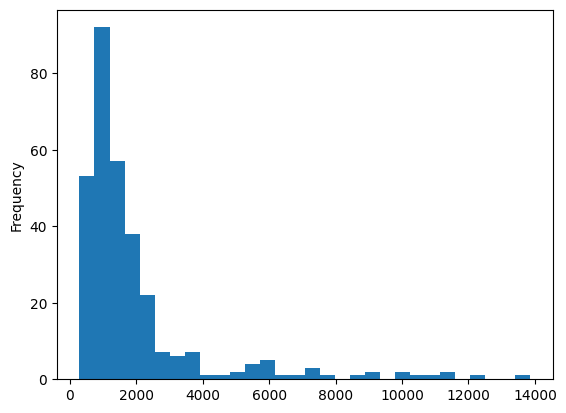

In [23]:
data['Alk_Phos'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

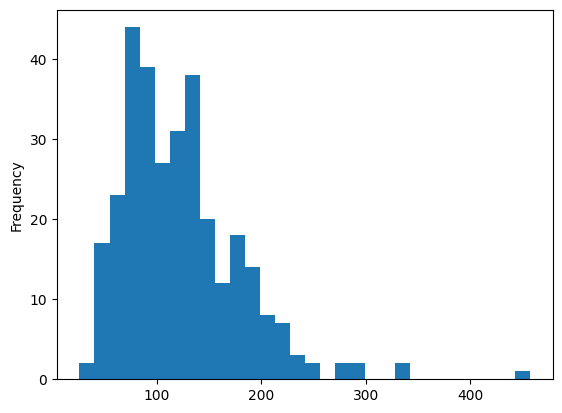

In [24]:
data['SGOT'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

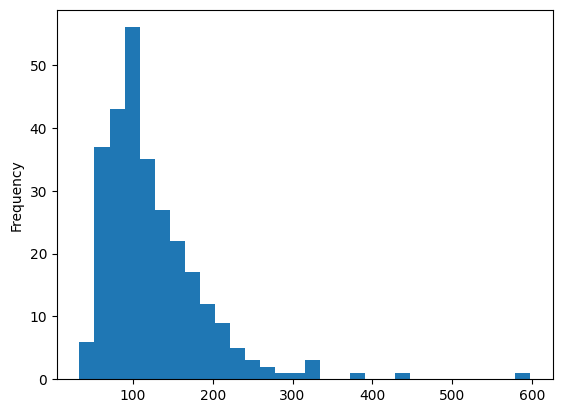

In [25]:
data['Tryglicerides'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

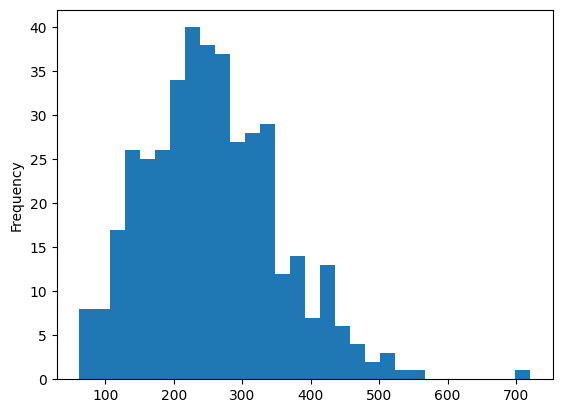

In [26]:
data['Platelets'].plot(kind='hist', bins = 30)

<Axes: ylabel='Frequency'>

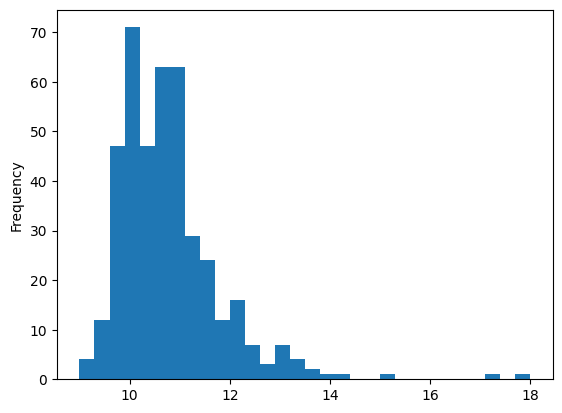

In [27]:
data['Prothrombin'].plot(kind='hist', bins = 30)

<Axes: >

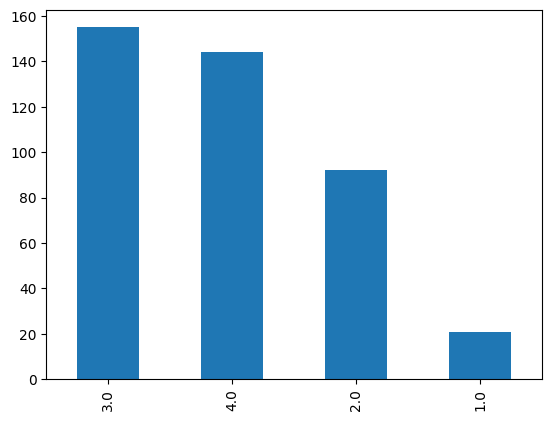

In [28]:
data['Stage'].value_counts().plot(kind='bar')

In [29]:
#check for NaN
data.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [30]:
#check for ordinal vs numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Handle categorical columns
categorical_cols = ['Status', 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Sex']
numerical_cols = ['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage']
encoder = LabelEncoder()
encoded_data = data.copy()  # Make a copy to avoid modifying original data
for col in categorical_cols:
  encoder.fit(data[col])  # Fit encoder on each categorical column
  encoded_data[col] = encoder.transform(data[col])  # Encode each column
# Impute missing values
imputer = IterativeImputer(random_state=0, max_iter=10, min_value = 0)
imputer.fit(encoded_data)
encoded_data[:] = imputer.transform(encoded_data)

<ipython-input-44-96df751404a4>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  encoded_data[:] = imputer.transform(encoded_data)


In [38]:
imputed_data = encoded_data

In [39]:
imputed_data.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [98]:
# create dataset with dropped any null values
dropped_data = data.dropna()
# encode the dropped dataset
encoderd = LabelEncoder()
for col in categorical_cols:
  encoderd.fit(dropped_data[col])  # Fit encoder on each categorical column
  dropped_data[col] = encoderd.transform(dropped_data[col])  # Encode each column

<ipython-input-98-54198c4683ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_data[col] = encoderd.transform(dropped_data[col])  # Encode each column
<ipython-input-98-54198c4683ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_data[col] = encoderd.transform(dropped_data[col])  # Encode each column
<ipython-input-98-54198c4683ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [97]:
# Encode the target variable
le = LabelEncoder()
imputed_data['Stage'] = le.fit_transform(imputed_data['Stage'])
dropped_data['Stage'] = le.fit_transform(dropped_data['Stage'])

<ipython-input-97-06ba13eaeb6d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_data['Stage'] = le.fit_transform(dropped_data['Stage'])


In [61]:
#create test and training set
from sklearn.model_selection import train_test_split

dropped_train, dropped_test = train_test_split(dropped_data, test_size=0.2)

In [62]:
#create test and training set for imputed dataset
from sklearn.model_selection import train_test_split

imputed_train, imputed_test = train_test_split(imputed_data, test_size=0.2)

In [72]:
#Decision Trees on normal data
# use tree.DecisionTreeClassifier()
# train the decision tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(imputed_train.loc[:, imputed_train.columns != 'Stage'], imputed_train['Stage'])

In [73]:
#Decision Trees on dropped data
# drop all na values
data.dropna()
# use tree.DecisionTreeClassifier()
# train the decision tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clfd = DecisionTreeClassifier(random_state=0)
clfd = clf.fit(dropped_train.loc[:, dropped_train.columns != 'Stage'], dropped_train['Stage'])

In [99]:
from sklearn.metrics import accuracy_score
# test the decision tree model with null data dropped
y_pred = clfd.predict(dropped_test.loc[:, dropped_test.columns != 'Stage'])
print("Accuracy:", accuracy_score(dropped_test['Stage'], y_pred))

Accuracy: 0.5


In [75]:
# test the decision tree model with null data imputed
y_pred = clf.predict(imputed_test.loc[:, imputed_test.columns != 'Stage'])
print("Accuracy:", accuracy_score(imputed_test['Stage'], y_pred))

Accuracy: 0.17857142857142858


In [76]:
#Logistic Regression
# use LogisticRegression(random_state=0).fit(X, y)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(imputed_train.loc[:, imputed_train.columns != 'Stage'], imputed_train['Stage'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
#Logistic Regression for data with NA values dropped
# use LogisticRegression(random_state=0).fit(X, y)
from sklearn.linear_model import LogisticRegression
lrd = LogisticRegression(random_state = 0).fit(dropped_train.loc[:, dropped_train.columns != 'Stage'], dropped_train['Stage'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
y_pred = lr.predict(imputed_test.loc[:, imputed_test.columns != 'Stage'])
print("Accuracy:", accuracy_score(imputed_test['Stage'], y_pred))

Accuracy: 0.44047619047619047


In [80]:
y_pred = lrd.predict(dropped_test.loc[:, dropped_test.columns != 'Stage'])
print("Accuracy:", accuracy_score(dropped_test['Stage'], y_pred))

Accuracy: 0.48214285714285715


In [81]:
#XGBoost (Extreme Gradient Boosting) for dropped data
#xgb.DMatrix(data, label=label)
import xgboost as xgb
xm = xgb.DMatrix(dropped_train.loc[:, dropped_train.columns != 'Stage'], dropped_train['Stage'], enable_categorical=True)

In [82]:
#XGBoost (Extreme Gradient Boosting) for imputed data
#xgb.DMatrix(data, label=label)
import xgboost as xgb
xmd = xgb.DMatrix(imputed_train.loc[:, imputed_train.columns != 'Stage'], imputed_train['Stage'], enable_categorical=True)

In [95]:
#dropped
params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 10}
n = 100

resultsd = xgb.cv(
   params, xmd,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:31:59] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:32:00] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:32:01] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:32:02] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)


In [96]:
resultsd

,train-mlogloss-mean,train-mlogloss-std,train-auc-mean,train-auc-std,train-merror-mean,train-merror-std,test-mlogloss-mean,test-mlogloss-std,test-auc-mean,test-auc-std,test-merror-mean,test-merror-std
0,1.666318,0.015481,NaN,NaN,0.243996,0.011333,1.930992,0.041131,NaN,NaN,0.533107,0.055645
1,1.316491,0.020535,NaN,NaN,0.167659,0.013613,1.757465,0.075890,NaN,NaN,0.536047,0.076571
2,1.079681,0.016737,NaN,NaN,0.124979,0.017954,1.657769,0.090608,NaN,NaN,0.518046,0.062958
3,0.908587,0.027274,NaN,NaN,0.098038,0.023295,1.594452,0.103140,NaN,NaN,0.530077,0.064182
4,0.774969,0.033867,NaN,NaN,0.080069,0.025707,1.537093,0.104267,NaN,NaN,0.521167,0.056655
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.026158,0.000623,NaN,NaN,0.000000,0.000000,1.839640,0.301514,NaN,NaN,0.532972,0.061130
96,0.026000,0.000611,NaN,NaN,0.000000,0.000000,1.841510,0.300565,NaN,NaN,0.529941,0.060811
97,0.025828,0.000609,NaN,NaN,0.000000,0.000000,1.843638,0.302565,NaN,NaN,0.529941,0.060811
98,0.025669,0.000610,NaN,NaN,0.000000,0.000000,1.844492,0.303606,NaN,NaN,0.529941,0.060811


In [93]:
#imputed
params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": 10}
n = 100

results = xgb.cv(
   params, xm,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:31:01] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:31:02] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:31:03] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:31:04] WARNING: /workspace/src/metric/auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:31:05] WAR

In [94]:
results

,train-mlogloss-mean,train-mlogloss-std,train-auc-mean,train-auc-std,train-merror-mean,train-merror-std,test-mlogloss-mean,test-mlogloss-std,test-auc-mean,test-auc-std,test-merror-mean,test-merror-std
0,1.637157,0.014029,NaN,NaN,0.211364,0.034355,1.941644,0.027066,NaN,NaN,0.554545,0.018182
1,1.269656,0.021706,NaN,NaN,0.129545,0.029061,1.736469,0.013435,NaN,NaN,0.500000,0.035209
2,1.018805,0.025537,NaN,NaN,0.082955,0.022035,1.623425,0.014880,NaN,NaN,0.522727,0.028748
3,0.833036,0.024624,NaN,NaN,0.048864,0.013252,1.525190,0.034698,NaN,NaN,0.513636,0.034015
4,0.694237,0.019574,NaN,NaN,0.035227,0.013154,1.451421,0.046479,NaN,NaN,0.518182,0.036364
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.024572,0.000343,NaN,NaN,0.000000,0.000000,1.471116,0.089644,NaN,NaN,0.486364,0.042153
96,0.024415,0.000345,NaN,NaN,0.000000,0.000000,1.472218,0.088956,NaN,NaN,0.486364,0.042153
97,0.024262,0.000349,NaN,NaN,0.000000,0.000000,1.474298,0.089004,NaN,NaN,0.486364,0.042153
98,0.024115,0.000352,NaN,NaN,0.000000,0.000000,1.476807,0.088522,NaN,NaN,0.486364,0.042153
